In [104]:
from neqsim.process import (clearProcess, compressor, heater, runProcess,
                            separator, stream, valve, viewProcess, separator3phase, cooler)
from neqsim.thermo import fluid, printFrame
from neqsim import jNeqSim

factor = 1.0
c6pluscomponents = ['n-hexane', 'n-heptane', 'c-hexane', 'c-C7', 'benzene', 'c-C8', 'toluene', 'n-octane','n-nonane', 'm-Xylene', 'nC10', 'nC11' , 'nC12', '2-m-C5', '3-m-C5']

c6components = ['n-hexane', '2-m-C5', '3-m-C5']
c7components = ['n-heptane', 'benzene','c-hexane']
c8components= [ 'c-C7','toluene', 'n-octane']
c9components= ['n-nonane','m-Xylene','c-C8']
c10components= ['nC10']
c11components= ['nC11']
c12components= ['nC12']

fluid1 = jNeqSim.thermo.system.SystemUMRPRUMCEos(280.0, 10.0)
fluid1.addComponent("CO2", 0.00591)
fluid1.addComponent("nitrogen", 0.00971)
fluid1.addComponent("methane", 0.948)
fluid1.addComponent("ethane", 0.0251)
fluid1.addComponent("propane", 0.00406)
fluid1.addComponent("i-butane", 0.00148)
fluid1.addComponent("n-butane", 0.00101)
fluid1.addComponent("i-pentane", 0.000782)
fluid1.addComponent("n-pentane", 0.000433)
fluid1.addComponent("2-m-C5", 0.000407*factor)
fluid1.addComponent("3-m-C5", 0.000128*factor)
fluid1.addComponent("n-hexane", 0.000213*factor)
fluid1.addComponent("n-heptane", 0.000157*factor)
fluid1.addComponent("c-hexane", 0.000854*factor)
fluid1.addComponent("c-C7", 0.000608*factor)
fluid1.addComponent("benzene", 2.23E-05*factor)
fluid1.addComponent("n-octane", 4.64E-05*factor)
fluid1.addComponent("toluene", 5.81E-05*factor)
fluid1.addComponent("c-C8", 0.000105*factor)
fluid1.addComponent("n-nonane", 3.62E-05*factor)
fluid1.addComponent("m-Xylene", 3.86E-05*factor)
fluid1.addComponent("nC10", 5.07E-05*factor)
fluid1.addComponent("nC11", 2.48E-06*factor)
fluid1.addComponent("nC12", 4.04E-07*factor)
fluid1.setMixingRule("HV", "UNIFAC_UMRPRU")

clearProcess()

feedStream = stream(fluid1, "feed fluid")
feedStream.setTemperature(20.0, 'C')
feedStream.setPressure(84.0, 'barg')
feedStream.setFlowRate(25.7, 'MSm3/day')

separator1 = separator3phase(feedStream)

cooler1 = cooler(separator1.getGasOutStream())
cooler1.setOutTemperature(11.3, 'C')
cooler1.setOutPressure(80.8, 'barg')

separator2 = separator3phase(cooler1.getOutStream())
separator2.setEntrainment(0.1, 'mole', 'feed', 'oil', 'gas')

exportGas = stream(separator2.getGasOutStream())

runProcess()

printFrame(feedStream.getFluid())

                     0           1               2 3 4 5                6
0                            total             gas                       
1                  CO2  5.91466E-3      5.91466E-3        [mole fraction]
2             nitrogen  9.71766E-3      9.71766E-3        [mole fraction]
3              methane  9.48747E-1      9.48747E-1        [mole fraction]
4               ethane  2.51198E-2      2.51198E-2        [mole fraction]
5              propane   4.0632E-3       4.0632E-3        [mole fraction]
6             i-butane  1.48117E-3      1.48117E-3        [mole fraction]
7             n-butane   1.0108E-3       1.0108E-3        [mole fraction]
8            i-pentane  7.82617E-4      7.82617E-4        [mole fraction]
9            n-pentane  4.33341E-4      4.33341E-4        [mole fraction]
10              2-m-C5  4.07321E-4      4.07321E-4        [mole fraction]
11              3-m-C5  1.28101E-4      1.28101E-4        [mole fraction]
12            n-hexane  2.13168E-4    

In [80]:
exportGasFluid = separator2.getGasOutStream().getFluid().clone()

exportGasFluid.setTemperature(0.0, "C")
exportGasFluid.setPressure(10.0, "bara")

cvdSim = jNeqSim.PVTsimulation.simulation.SaturationPressure(exportGasFluid)
cvdSim.run()


print('dew point pressur @0C ', cvdSim.getSaturationPressure(), ' bara')

dew point pressur @0C  100.66896057128906  bara


In [105]:
def getC6plus(fluid):
    sum = 0.0
    for components in c6pluscomponents:
      sum += fluid.getComponent(components).getz()
    return sum

def getC6(fluid):
    sum = 0.0
    for components in c6components:
      sum += fluid.getComponent(components).getz()
    return sum

def getC7(fluid):
    sum = 0.0
    for components in c7components:
      sum += fluid.getComponent(components).getz()
    return sum

def getC8(fluid):
    sum = 0.0
    for components in c8components:
      sum += fluid.getComponent(components).getz()
    return sum
    
def getC9(fluid):
    sum = 0.0
    for components in c9components:
      sum += fluid.getComponent(components).getz()
    return sum

def getC10(fluid):
    sum = 0.0
    for components in c10components:
      sum += fluid.getComponent(components).getz()
    return sum

def getC11(fluid):
    sum = 0.0
    for components in c11components:
      sum += fluid.getComponent(components).getz()
    return sum

def getC12(fluid):
    sum = 0.0
    for components in c12components:
      sum += fluid.getComponent(components).getz()
    return sum

In [89]:
scrubberEfficiency = []
c6plus = []
dewpointpressure = []

import numpy as np 
for efficiency in np.arange (0.0, 1.0, 0.01):
    scrubberEfficiency.append(efficiency*100)
    separator2.setEntrainment(efficiency, 'mole', 'feed', 'oil', 'gas')
    separator2.run()
    exportGas.run()
    exportGasFluid = separator2.getGasOutStream().getFluid().clone()
    exportGasFluid.setTemperature(0.0, "C")
    exportGasFluid.setPressure(10.0, "bara")
    cvdSim = jNeqSim.PVTsimulation.simulation.SaturationPressure(exportGasFluid)
    cvdSim.run()
    c6plus.append(getC6plus(exportGasFluid)*100)
    dewpointpressure.append(cvdSim.getSaturationPressure()-1.01325)
    #print('efficiency ', efficiency)
    #print('dew point pressur @0C ', cvdSim.getSaturationPressure(), ' bara')
    #print('C6+ ', cvdSim.getSaturationPressure(), ' bara')


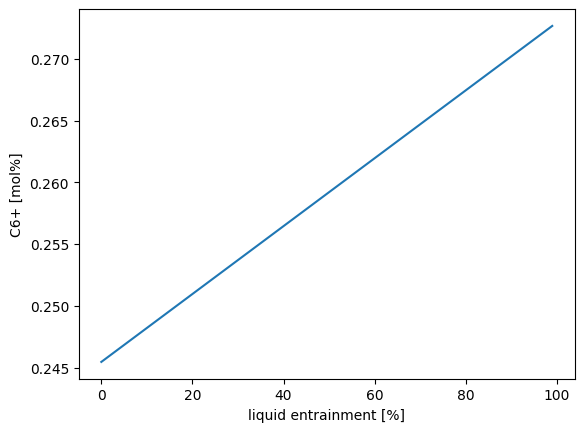

In [94]:
import matplotlib.pyplot as plt
plt.plot(scrubberEfficiency, c6plus)
plt.ylabel('C6+ [mol%]')
plt.xlabel('liquid entrainment [%]')
plt.show()

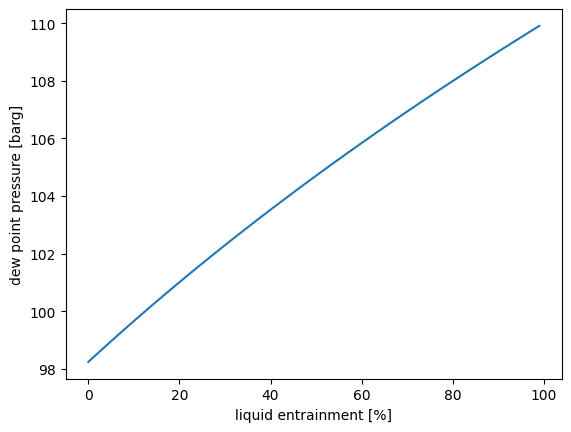

In [95]:
import matplotlib.pyplot as plt
plt.plot(scrubberEfficiency, dewpointpressure)
plt.ylabel('dew point pressure [barg]')
plt.xlabel('liquid entrainment [%]')
plt.show()

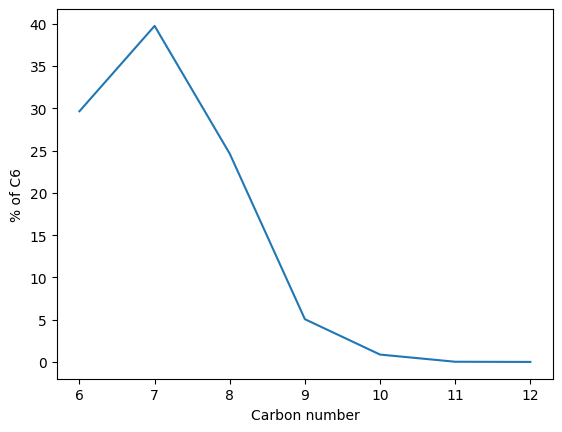

In [126]:
# Composition distribution 

entrainment = 0.0
separator2.setEntrainment(entrainment/100.0, 'mole', 'feed', 'oil', 'gas')
separator2.run()
exportGas.run()

exportGasFluid = separator2.getGasOutStream().getFluid().clone()

c6pusfractiontemp = getC6plus(exportGasFluid)

distname = [6, 7,8 ,9,10, 11, 12]
distribution = [getC6(exportGasFluid)/c6pusfractiontemp*100, getC7(exportGasFluid)/c6pusfractiontemp*100,getC8(exportGasFluid)/c6pusfractiontemp*100,getC9(exportGasFluid)/c6pusfractiontemp*100,getC10(exportGasFluid)/c6pusfractiontemp*100, getC11(exportGasFluid)/c6pusfractiontemp*100, getC12(exportGasFluid)/c6pusfractiontemp*100]

import matplotlib.pyplot as plt
plt.plot(distname, distribution)
plt.ylabel('% of C6')
plt.xlabel('Carbon number')
#plt.yscale('log')
plt.show()